# TEST worksheet, to be prettyfied/explained.  

In [192]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

%load_ext autoreload
%autoreload 2
%aimport scqubits

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [193]:
import matplotlib.pyplot as plt
import numpy as np
import scqubits as scq

In [194]:
# from pathos.multiprocessing import ProcessingPool    
# pool = ProcessingPool(nodes=8)

# map_fun=pool.map
map_fun=map

## Let us show what units the library currently assumes

In [195]:
scq.get_units()

'GHz'

## Let's define a few qubits and list the noise channels that they support

### Transmon (charge qubit parameters)

In [196]:
transmon = scq.Transmon(
    EJ=0.5,
    EC=12.0,
    ng=0.3,
    ncut=150
)
print(transmon)
transmon.supported_noise_channels()

TRANSMON
 ———— PARAMETERS ————
EJ	: 0.5
EC	: 12.0
ng	: 0.3
ncut	: 150
truncated_dim	: None
Hilbert space dimension	: 301


['tphi_1_over_f_cc',
 'tphi_1_over_f_ng',
 't1_capacitive_loss',
 't1_charge_impedance']

We can calculate a given decohernce time with an appropriate method. Take default parameters:

In [197]:
transmon.tphi_1_over_f_ng()

3.770056749342735

Or explore be more specific with what we want (choose a downward transition from level 3 to 1, at T=0.100K):

In [198]:
transmon.t1_charge_impedance(i=3,j=1, T=0.100)

3013.2215669102766

Or plot all supported noise channels (in currently set units)

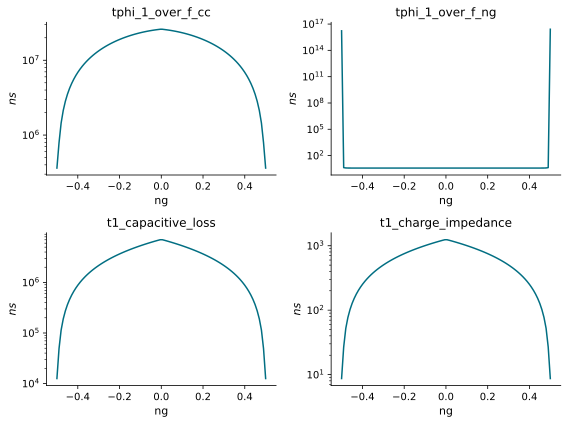

In [199]:
transmon.plot_noise(param_name='ng', param_vals=np.linspace(-0.5, 0.5, 100));

Scale the results, so that end up with time in units of $\mu s$

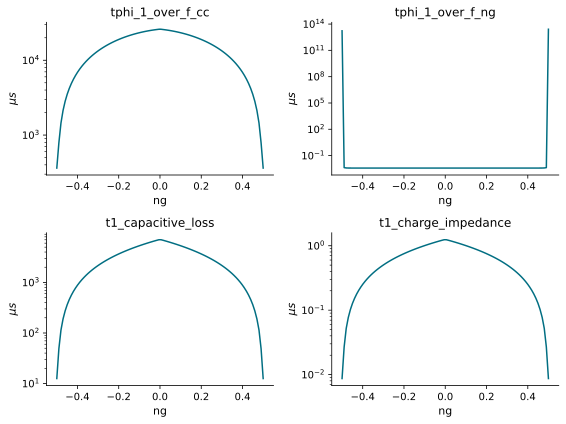

In [200]:
transmon.plot_noise(param_name='ng', param_vals=np.linspace(-0.5, 0.5, 100), scale=1e-3, ylabel=r"$\mu s$");

Look at just a coulpe of channels, each with its own non-default options. We also customize one of the pluts further.

Text(0.5, 1.0, 'loss channel: t1_capacitive_loss')

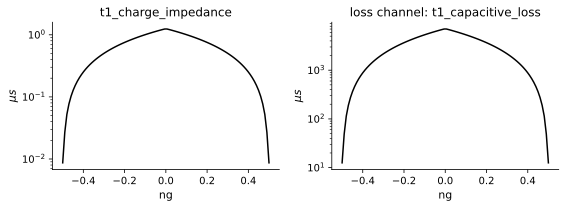

In [201]:
fig, ax=transmon.plot_noise(noise_channels=['t1_charge_impedance', 't1_capacitive_loss'], 
                    param_name='ng', 
                    param_vals=np.linspace(-0.5, 0.5, 100), 
                    scale=1e-3, ylabel=r"$\mu s$", color='black');

#customize the title
ax[1].set_title("loss channel: t1_capacitive_loss")

We can also pass specific options to calculations for ceratin noise channels. Below, as an example, we choose a non-default temperateure for the ``t1_capacitive_loss`` channel calculation, and a transition between non-default levels) 

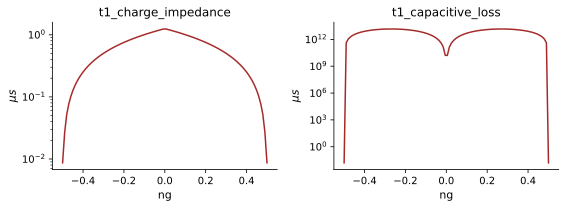

In [202]:
transmon.plot_noise(noise_channels=[
    't1_charge_impedance',
    ('t1_capacitive_loss', dict(T=0.045, i=3, j=2))
     ],  param_name='ng',  param_vals=np.linspace(-0.5, 0.5, 100), 
    scale=1e-3, ylabel=r"$\mu s$", color='brown');

Can also plot just one channel, and provide standard plotting options directly to ``plot_noise()``

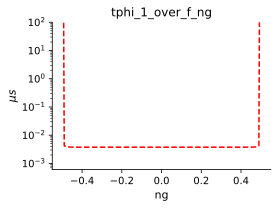

In [203]:
transmon.plot_noise(noise_channels='tphi_1_over_f_ng', param_name='ng', 
                    param_vals=np.linspace(-0.5, 0.5, 100), 
                    scale=1e-3, ylabel=r"$\mu s$", linestyle='--', color='red', ylim=(None, 1e2));

### Tunable Transmon

In [204]:
tune_tmon = scq.TunableTransmon(
    EJmax=20.0,
    EC=0.5,
    d=0.00,
    flux=0.0,
    ng=0.3,
    ncut=150
)
print(tune_tmon)
tune_tmon.supported_noise_channels()

TUNABLETRANSMON
 ———— PARAMETERS ————
EJmax	: 20.0
EC	: 0.5
d	: 0.0
flux	: 0.0
ng	: 0.3
ncut	: 150
truncated_dim	: None
Hilbert space dimension	: 301


['tphi_1_over_f_flux',
 'tphi_1_over_f_cc',
 'tphi_1_over_f_ng',
 't1_capacitive_loss',
 't1_flux_bias_line',
 't1_charge_impedance']

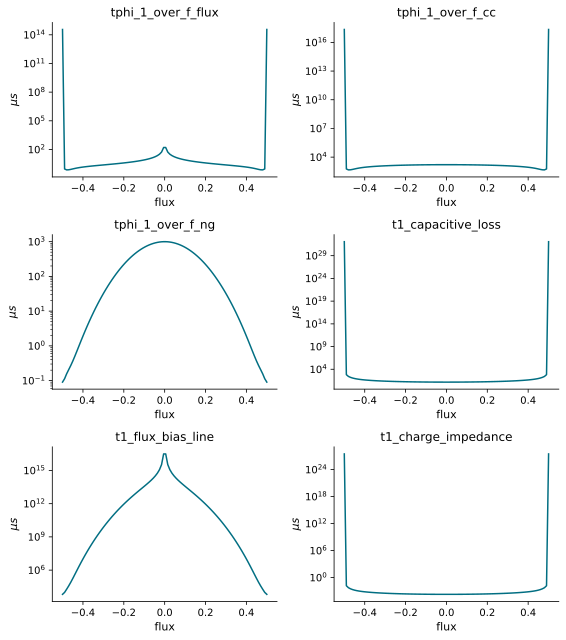

In [205]:
tune_tmon.plot_noise(param_name='flux', param_vals=np.linspace(-0.5, 0.5, 100), scale=1e-3, ylabel=r"$\mu s$");

### Fluxonium

In [206]:
fluxonium = scq.Fluxonium(
    EJ=8.9,
    EC=2.5,
    EL=0.5,
    cutoff = 150,
    flux = 0.5
)
print(fluxonium)
fluxonium.supported_noise_channels()

FLUXONIUM
 ———— PARAMETERS ————
EJ	: 8.9
EC	: 2.5
EL	: 0.5
flux	: 0.5
cutoff	: 150
truncated_dim	: None
Hilbert space dimension	: 150


['tphi_1_over_f_cc',
 'tphi_1_over_f_flux',
 't1_flux_bias_line',
 't1_capacitive_loss',
 't1_inductive_loss',
 't1_charge_impedance']

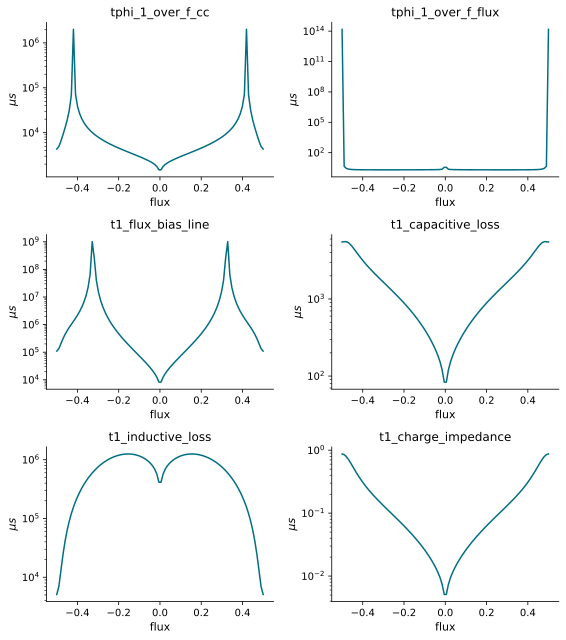

In [207]:
fluxonium.plot_noise(param_name='flux', param_vals=np.linspace(-0.5, 0.5, 100), scale=1e-3, ylabel=r"$\mu s$");

### Flux Qubit

In [208]:
# parameters for the flux qubit
RATIO = 60.0
ALPHA = 0.8
flux_qubit = scq.FluxQubit(
    EJ1 = 1.0, 
    EJ2 = 1.0, 
    EJ3 = ALPHA*1.0, 
    ECJ1 = 1.0/RATIO, 
    ECJ2 = 1.0/RATIO, 
    ECJ3 = 1.0/ALPHA/RATIO, 
    ECg1 = 50.0/RATIO, 
    ECg2 = 50.0/RATIO, 
    ng1 = 0.0, 
    ng2 = 0.0, 
    flux = 0.4, 
    ncut = 10,
)
print(flux_qubit)
flux_qubit.supported_noise_channels()

FLUXQUBIT
 ———— PARAMETERS ————
EJ1	: 1.0
EJ2	: 1.0
EJ3	: 0.8
ECJ1	: 0.016666666666666666
ECJ2	: 0.016666666666666666
ECJ3	: 0.020833333333333332
ECg1	: 0.8333333333333334
ECg2	: 0.8333333333333334
ng1	: 0.0
ng2	: 0.0
flux	: 0.4
ncut	: 10
truncated_dim	: None
Hilbert space dimension	: 441


['tphi_1_over_f_cc1',
 'tphi_1_over_f_cc2',
 'tphi_1_over_f_cc3',
 'tphi_1_over_f_cc']

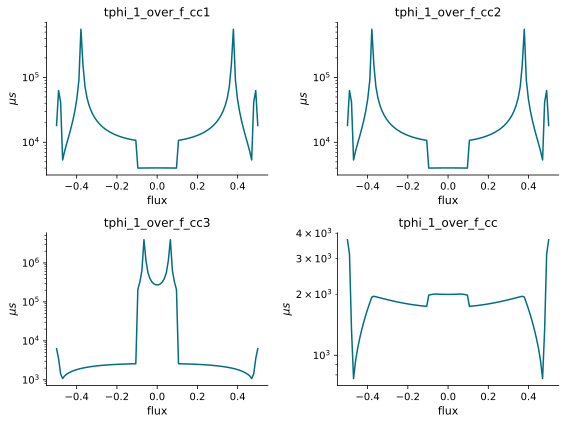

In [209]:
flux_qubit.plot_noise(param_name='flux', param_vals=np.linspace(-0.5, 0.5, 100), scale=1e-3, ylabel=r"$\mu s$");

### ZeroPi

In [210]:
phi_grid = scq.Grid1d(-6*np.pi, 6*np.pi, 200)

EJ_CONST = 1/3.95  # note that EJ and ECJ are interrelated

zero_pi = scq.ZeroPi(
    grid = phi_grid,
    EJ   = EJ_CONST,
    EL   = 10.0**(-2),
    ECJ  = 1/(8.0*EJ_CONST),
    EC = None,
    ECS  = 10.0**(-3),
    ng   = 0.1,
    flux = 0.23,
    ncut = 30
)
print(zero_pi)
zero_pi.supported_noise_channels()

ZEROPI
 ———— PARAMETERS ————
EJ	: 0.2531645569620253
EL	: 0.01
ECJ	: 0.4937500000000001
EC	: 0.001002029426686961
dEJ	: 0
dCJ	: 0
ng	: 0.1
flux	: 0.23
grid	:     Grid1d ......
max_val	: 18.84955592153876
min_val	: -18.84955592153876
pt_count	: 200
ncut	: 30
truncated_dim	: None
Hilbert space dimension	: 12200


['tphi_1_over_f_cc',
 'tphi_1_over_f_flux',
 't1_flux_bias_line',
 't1_inductive_loss']

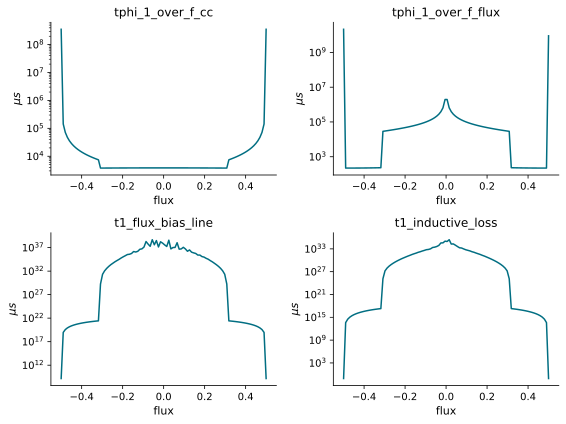

In [211]:
zero_pi.plot_noise(param_name='flux', param_vals=np.linspace(-0.5, 0.5, 100), scale=1e-3, ylabel=r"$\mu s$");